In [17]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [35]:
X = npr.normal(size=(1000,4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1-t) + X[:, 2]

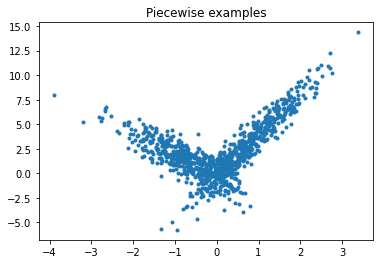

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], y, ".")
ax.set_title("Piecewise examples");

In [6]:
X.shape

(1000, 4)

In [7]:
y.shape

(1000,)

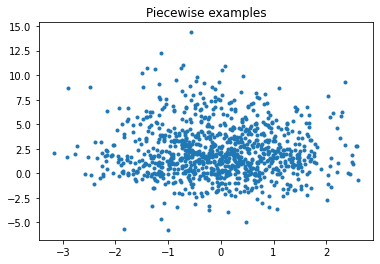

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 1], y, ".")
ax.set_title("Piecewise examples");

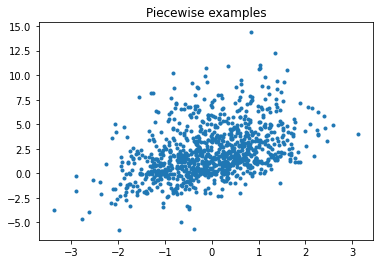

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 2], y, ".")
ax.set_title("Piecewise examples");

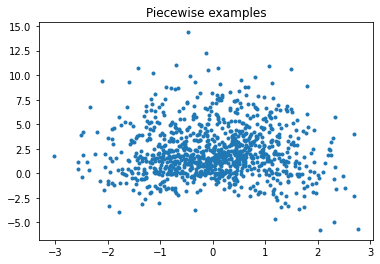

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 3], y, ".")
ax.set_title("Piecewise examples");

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('C:\\Users\\verma\\Desktop\\GPR\\housing.csv')

In [13]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [14]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [29]:
Y=np.array(df.iloc[:,3])

In [24]:
x=np.array(df.iloc[:,:3])

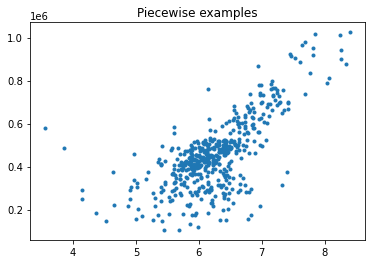

In [32]:
fig, ax = plt.subplots(1, 1)
ax.plot(x[:, 0], y[:], ".")
ax.set_title("Piecewise examples");

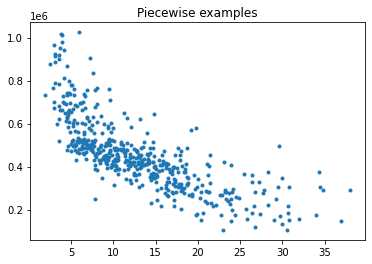

In [33]:
fig, ax = plt.subplots(1, 1)
ax.plot(x[:, 1], y[:], ".")
ax.set_title("Piecewise examples");

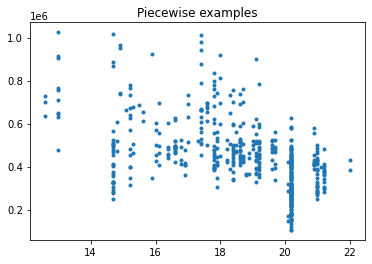

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x[:, 2], y[:], ".")
ax.set_title("Piecewise examples");

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:, :1], y)

In [38]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor

model = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=300))
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


PiecewiseRegressor(binner=DecisionTreeRegressor(min_samples_leaf=300),
                   estimator=LinearRegression(), verbose=True)

In [39]:
pred = model.predict(X_test)
pred[:5]

array([0.84146087, 1.68295745, 1.51937157, 1.01995235, 3.35651538])

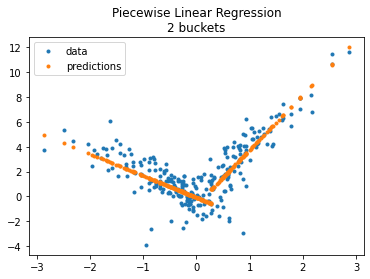

In [40]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], pred, ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n2 buckets")
ax.legend();